Test score with Random Forest: 0.8840
Example run in 4.470 s


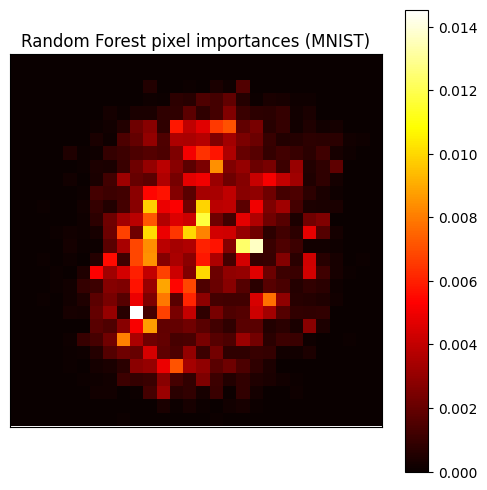

In [4]:
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.ensemble import RandomForestClassifier

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

#RandomForest needs no sccaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = RandomForestClassifier(n_estimators=10,random_state=0)
clf.fit(X_train, y_train)
#sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
#print("Sparsity with L1 penalty: %.2f%%" % sparsity)
#print("Test score with L1 penalty: %.4f" % score)
print("Test score with Random Forest: %.4f" % score)

importances = clf.feature_importances_
plt.figure(figsize=(6, 6))
plt.imshow(importances.reshape(28, 28), interpolation="nearest", cmap=plt.cm.hot)
plt.xticks([])
plt.yticks([])
plt.title("Random Forest pixel importances (MNIST)")
plt.colorbar()

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()